<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2024/blob/master/08_scipy_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8 - Statistics in Python (Second part - 50')


> A very (very) basic introduction on statistics in Python. In this first introductory lesson we will just present some *Measures of Central Tendency* (median, mean and weighted mean) and *Measures of Variability* (variance and standard deviation). We will also talk about *Percentiles* and *Missing values*.
> 
TODO

sources:

https://medium.com/insights-school/learn-basic-statistics-with-python-cc0f45275929

https://scipy-lectures.org/intro/scipy.html#scipy


In [61]:
import math
import statistics
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TODO
import plotnine as p9

## Outline
 * [Loading a dataset](#Loading-a-dataset) 
 * [Pearson correlation](#Pearson-correlation)
 * [Spearman correlation](#Spearman-correlation)
 * [Linear regression](#Linear-regression)
 * [Student's t-test](#Student's-t-test)
   * [One-sample t-test](#One-sample-t-test)
   * [Two-sample t-test (Independent samples t-test)](#Two-sample-t-test-(Independent-samples-t-test))
   * [Paired-samples t-test (Dependent samples t-test)](#Paired-samples-t-test-(Dependent-samples-t-test))

Linear models, multiple factors, and analysis of variance

Categorical variables

Link to t-tests between different FSIQ and PIQ

Multiple Regression

Analysis of variance (ANOVA)

This document is devised as a tool to enable your **self-learning process**. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance. Along it, you will find some **special cells**:

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session. Usually, solutions are provided using hidden cells (look for the dot dot dot symbol "..." and click to unravel them and check that your try is correct).
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

## Loading a dataset

Let's stats by loading a dataset from this cool [online resource](https://lectures.scientific-python.org/packages/statistics/index.html).

In [65]:
# Loading the "Brain Size" dataset directly from an URL
df = pd.read_csv(
    filepath_or_buffer='https://scipy-lectures.org/_downloads/brain_size.csv',
    sep=';',
    na_values=".",
    index_col=0
)

# Show df's head
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


The columns *FSIQ*, *VIQ* and *PIQ* stand for different "intelligence quotients" (in arbitrary units I guess) and the *MRI_Count* is another "intelligence" measure based on magnetic resonance imaging (also in some kind of arbitrary unit I guess). The columns *Gender*, *Weight* and *Height* express the gender, the weight (in pounds) and the height (in inches) of the individuals, respectively. Before starting, let's express *Weight* and *Height* column values to metric units to avoid an eventual [Mars probe crash](https://www.simscale.com/blog/nasa-mars-climate-orbiter-metric/).

In [66]:
# Convert from imperial units to metric units
df['Weight_kg'] = df['Weight'] * 0.45359237
df['Height_m'] = df['Height'] * 0.0254

# Drop imperial columns
df.drop(columns=['Weight', 'Height'], inplace=True)

# Show df's head
df.head()

,Gender,FSIQ,VIQ,PIQ,MRI_Count,Weight_kg,Height_m
1,Female,133,132,124,816932,53.523900,1.63830
2,Male,140,150,124,1001121,NaN,1.84150
3,Male,139,123,150,1038437,64.863709,1.86182
4,Male,133,129,128,965353,78.017888,1.74752
5,Female,137,132,134,951545,66.678078,1.65100


## Pearson correlation
We can compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) using the [`pearsonr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function from **SciPy**'s stats module. This function takes two arrays and returns a tuple containing **Pearson correlation coefficient** and the **significance of the correlation** as p-value.

In [4]:
# Get Pearson between 'FSIQ' and 'VIQ' using SciPy
stats.pearsonr(x=df['FSIQ'], y=df['VIQ'])

PearsonRResult(statistic=np.float64(0.9466387777452883), pvalue=np.float64(2.7891295872460796e-20))

We can also get the Pearson correlation coefficient using the [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) **Pandas** method:

In [5]:
# Get Pearson between 'FSIQ' and 'VIQ' using Pandas
df['FSIQ'].corr(df['VIQ'], method="pearson")

np.float64(0.9466387777452884)

Look what happens when we apply this `.corr()` method to a Dataframe:

In [6]:
# Get Pearson for all pair-wise pairs 'FSIQ' and 'VIQ' using Pandas
df[['FSIQ', 'VIQ']].corr(method='pearson')

,FSIQ,VIQ
FSIQ,1.000000,0.946639
VIQ,0.946639,1.000000


By using the **Pandas** method `corr()` on a dataframe, we obtain all possible pair-wise correlations nicely displayed in a "square" dataframe (or matrix). Let's try this strategy again on the whole `df` dataframe (note the trick of the `numeric_only=` argument to avoid the error that pops up when trying to compute correlations involving the `'Gender'` column):

In [7]:
# Get all pair-wise Pearson from our df
df_PCC = df.corr(method='pearson', numeric_only=True)

# Show the Pearson correlation matrix
df_PCC

,FSIQ,VIQ,PIQ,MRI_Count,Weight [kg],Height [m]
FSIQ,1.000000,0.946639,0.934125,0.357641,-0.051483,-0.086002
VIQ,0.946639,1.000000,0.778135,0.337478,-0.076088,-0.071068
PIQ,0.934125,0.778135,1.000000,0.386817,0.002512,-0.076723
MRI_Count,0.357641,0.337478,0.386817,1.000000,0.513378,0.601712
Weight [kg],-0.051483,-0.076088,0.002512,0.513378,1.000000,0.699614
Height [m],-0.086002,-0.071068,-0.076723,0.601712,0.699614,1.000000


Now let's leverage Seaborn [`.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize this!

<Axes: >

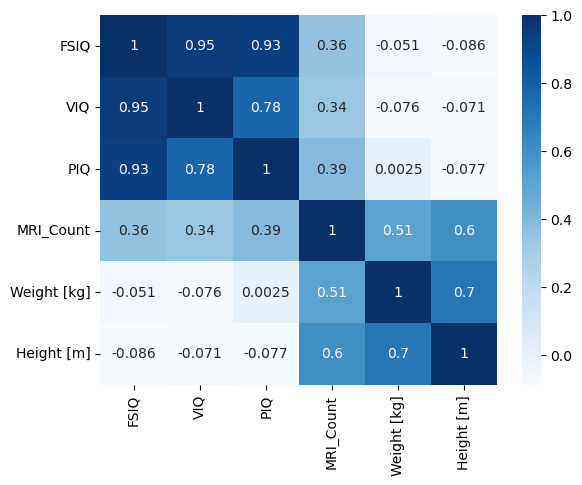

In [8]:
# Plot the correlation matrix (HEATMAP!)
sns.heatmap(data=df_PCC, cmap="Blues", annot=True)

It seems that *FSIQ*, *VIQ* and *PIQ* are very correlated, and similarly, *Weight [kg]*, *Height [m]* and (to a lesser extend) *MRI_Count*.

## Spearman correlation

Pearson correlation assumes that the data we are comparing is <u>**normally distributed**</u>. When this assumption is not true, the Pearson correlation value is not reflecting the true association. Spearman correlation does not assume that data follows a specific distribution, so it is a non-parametric correlation measure. Spearman correlation is also known as Spearman's rank correlation as it computes correlation coefficient on rank values of the data. Using **SciPy**, we can compute Spearman correlation using the function `spearmanr()`:

In [9]:
#The first element of tuple is the Spearman's rank correlation and the second is p-value.
stats.spearmanr(a=df['FSIQ'], b=df['VIQ'])

SignificanceResult(statistic=np.float64(0.9180538517127924), pvalue=np.float64(7.511345723342308e-17))

<div class="alert alert-block alert-info">

<b> Tip:</b> I don't know why `stats.pearsonr()` uses `x=` and `y=` as argument names and `stats.spearmanr()` uses `a=` and `b=`. In any case, you can use these two functions without specifying argument names: `stats.pearsonr(df['FSIQ'], df['VIQ'])` or `stats.spearmanr(df['FSIQ'], df['VIQ'])`.

</div>

Again, we can also get the Spearman correlation coefficient using the [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) **Pandas** method:

In [10]:
# Get Spearman between 'FSIQ' and 'VIQ' using Pandas
df['FSIQ'].corr(df['VIQ'], method="spearman")

np.float64(0.9180538517127924)

Now, we will use the Seaborn function [`clustermap()`](https://seaborn.pydata.org/generated/seaborn.clustermap.html) instead of `heatmap()`:

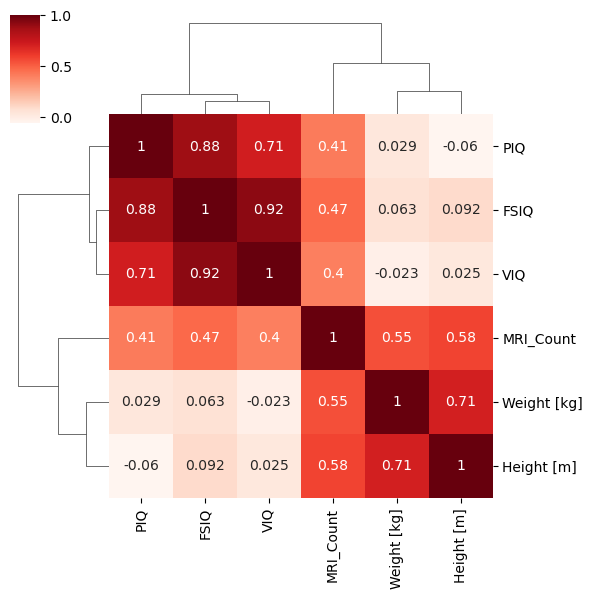

In [11]:
# Get all pair-wise Spearman from our df
df_ECC = df.corr(method='spearman', numeric_only=True)

# Show the Spearman correlation matrix
df_ECC

# Plot the Spearman correlation matrix (CLUSTERMAP!)
sns.clustermap(data=df_ECC, cmap="Reds", annot=True, z_score=None, figsize=(6,6))

Have a look at the [dendrogram](https://en.wikipedia.org/wiki/Dendrogram) and note how it hierarchizes closer those variables more correlated.

## Linear regression

With the **SciPy** function [`linregress()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) it's very easy to perform a linear regression and get all required coefficients.

In [12]:
# Compute a linear regression between 'FSIQ' and 'VIQ' using SciPy
stats.linregress(x=df['FSIQ'], y=df['VIQ'])

LinregressResult(slope=np.float64(0.9283222580345653), intercept=np.float64(7.031839825978565), rvalue=np.float64(0.9466387777452882), pvalue=np.float64(2.789129587246195e-20), stderr=np.float64(0.051271762159359316), intercept_stderr=np.float64(5.943180194069733))

Note how `stats.linregress()` returns an object storing five values: `slope`, `intercept`, `rvalue`, `pvalue`, `stderr` and `intercept_stde`. You can assign the output of `stats.linregress()` in a variable and easily access its elements as follows:

In [13]:
# Compute a linear regression between 'FSIQ' and 'VIQ' using SciPy
FitResults = stats.linregress(x=df['FSIQ'], y=df['VIQ'])

# Return the 'rvalue' (Pearson correlation) generated by the linear regression
FitResults.rvalue

np.float64(0.9466387777452882)

By using some f-string trickery we can easily prepare a nice annotation with the regression line equation:

In [14]:
# Gather the regression line equation (using just 3 decimal places with the :.3f trick)
annotation = f'y(x) = {FitResults.slope:.3f} x + {FitResults.intercept:.3f}'

# Show the regression line equation
print(annotation)

y(x) = 0.928 x + 7.032


Now, let's use **Seaborn** to visualize the regression line along with the data:

Text(95, 145, 'y(x) = 0.928 x + 7.032')

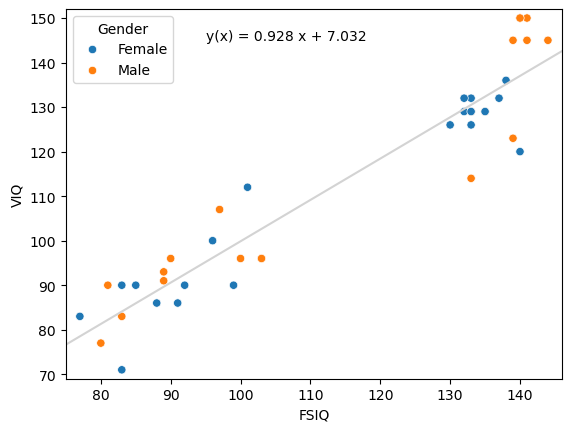

In [15]:
# Create the scatter plot with Seaborn
p = sns.scatterplot(data=df, x="FSIQ", y="VIQ", hue="Gender")

# Add the linear regression line (by hand) with Matplotlib
p.axline(xy1=(0, FitResults.intercept), slope=FitResults.slope, color='lightgray')

# Adjust scatter plot limits (by hand) with Matplotlib
p.set_xlim(df["FSIQ"].min()-2, df["FSIQ"].max()+2)
p.set_ylim(df["VIQ"].min()-2, df["VIQ"].max()+2) 

# Add regression line equation (by hand) with Matplotlib
plt.text(95, 145, annotation)

With **Plotnine** we can also get a very nice plot (maybe with less tweaking):

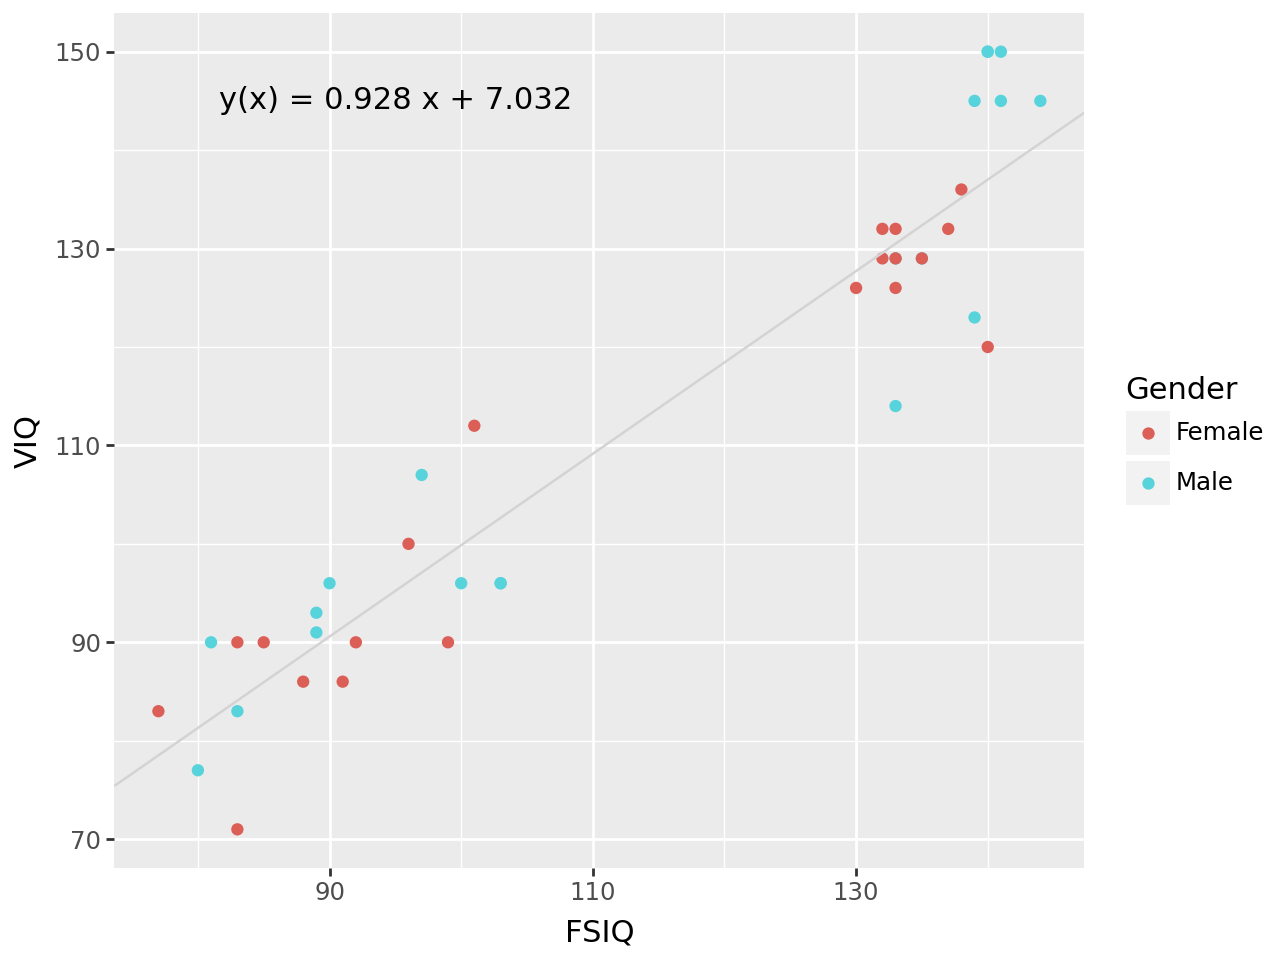

In [16]:
gg = (
    
    # Create the scatter plot with Plotnine
    p9.ggplot(data=df, mapping=p9.aes(x="FSIQ", y="VIQ", color="Gender"))
     + p9.geom_point()

    # Add the linear regression line (by hand)
     + p9.geom_abline(intercept=FitResults.intercept, slope=FitResults.slope, color='lightgray')

    # Add regression line equation (by hand)
     + p9.annotate(geom="text", x=95, y=145, label=annotation)
)

# Show plot
gg

## Student's t-test

A t-test is a statistical tool used to determine if there is a significant difference between the means of two groups, or between the mean of one group and a known value. There are three kinds of t-tests: **One-Sample t-test**, **Two-sample t-test** and **Paired samples t-test**.

### One-sample t-test

The one-sample t-test is used to **compare the mean of a single group to a known or hypothesized value**. This test is appropriate when you want to determine if a sample comes from a population with a specific mean. **SciPy** has implemented a function to perform one-sample t-test: [`scipy.stats.ttest_1samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html). Let's see an example:

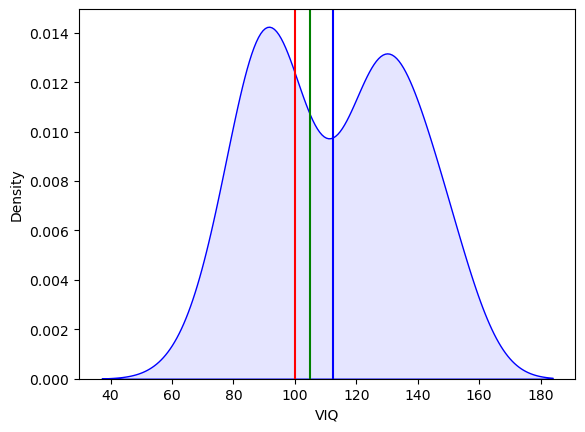

In [17]:
# Represent the distribution traced by VIQ and mark its mean
sns.kdeplot(data=df, x="VIQ", color='blue', fill='blue', alpha=0.1)
plt.axvline(x=df['VIQ'].mean(), color='blue')

# Mark a couple of arbitrary values
plt.axvline(x=100, color='red')
plt.axvline(x=105, color='green')

To test if the difference between the mean of *VIQ* and $105$ is significant, we should do:

In [18]:
# Launching a 1STT to check if VIQ mean differs than 105
stats.ttest_1samp(a=df['VIQ'], popmean=105)

TtestResult(statistic=np.float64(1.9683803719247213), pvalue=np.float64(0.05616184962448134), df=np.int64(39))

This function returns an object with the **T statistic**, the **p-value** and the **degrees of freedom**. If, for example, we assume a significance level of $0.05$, we cannot say that the mean of *VIQ* is different than $105$. In contrast, with this same significance level, we can say that the mean of *VIQ* is different than $100$:

In [19]:
# Launching a 1STT to check if VIQ mean differs than 100
stats.ttest_1samp(a=df['VIQ'], popmean=100)

TtestResult(statistic=np.float64(3.307414638540179), pvalue=np.float64(0.002030117404781822), df=np.int64(39))

### Two-sample t-test (Independent samples t-test)

The two-sample t-test is used to **compare the means of two unrelated groups**. The term "unrelated" means that the two groups are not related to each other (different patients with and without a given clinical condition for example). **SciPy** has implemented a function to perform two-sample t-test: [`scipy.stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). For example, let's compare the mean *VIQ* between females and males:

In [20]:
# Group by 'Gender' and get the mean VIQ
df_g = df.groupby(by='Gender').agg(Mean_VIQ=('VIQ', 'mean'))

# Show the data frame
df_g

,Mean_VIQ
Gender,
Female,109.45
Male,115.25


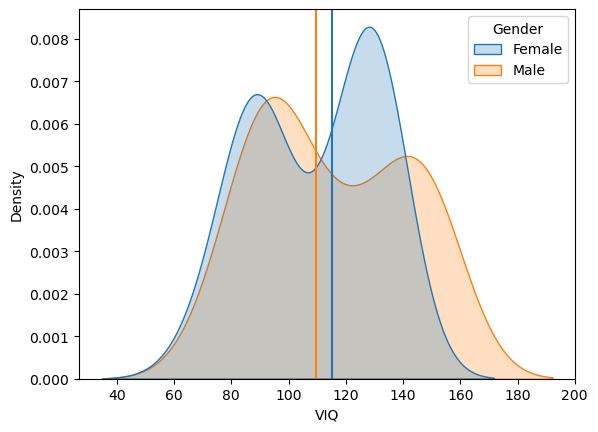

In [21]:
# Represent the distribution traced by VIQ differentiating males and females
sns.kdeplot(data=df, x="VIQ", hue='Gender', fill='Gender')

# Mark the mean VIQ for males (orange) and females (blue)
plt.axvline(x=df_g['Mean_VIQ']['Male'], color=sns.color_palette()[0])
plt.axvline(x=df_g['Mean_VIQ']['Female'], color=sns.color_palette()[1])
# Note how we used the same default colors used by Seaborn with sns.color_palette()[ ] ;)

It seems that the mean *VIQ* is slightly different between genders, but is this difference *statistically significant*? Let's check it out!

In [22]:
# Prepare filters for females and males
filter_F = df['Gender'] == 'Female'
filter_M = df['Gender'] == 'Male'

# Launching a 2STT to check if VIQ mean differs between females and males
stats.ttest_ind(df[filter_F]['VIQ'], df[filter_M]['VIQ'])

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

Assuming again the typical significance level of $0.05$, we cannot report a significant *VIQ* different between genders.

### Paired-samples t-test (Dependent samples t-test)

Finally, the paired samples t-test is used to **compare the means of two related groups**. Here, the term "related" denotes that the groups are not independent (same patients before and after a treatment for example). **SciPy** implements a function to perform paired-samples t-test: [`scipy.stats.ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html). In the previous example we compared *VIQ* between females and males (independent groups). Now, let's compare the three IQ estimators provided in our data set (*PIQ*, *VIQ*, and *FSIQ*).

<div class="alert alert-block alert-info">

<b>Tip:</b> We want to visualize the three IQ estimators in a same plot to better glimpse whats going on. In order to easily do that leveraging Seaborn, we first need to tweak a bit the original data frame `df` by melting it. By the way, we will also get the mean for each IQ estimator as we just did to get the mean <i>VIQ</i> for females and males.

</div>

In [23]:
# Melting our data frame to better visualize it with Seaborn
df_m = pd.melt(frame=df, id_vars=None, value_vars=['PIQ', 'VIQ', 'FSIQ'], var_name='IQ type', value_name='IQ value') 

# Show the data frame
df_m

,IQ type,IQ value
0,PIQ,124
1,PIQ,124
2,PIQ,150
3,PIQ,128
4,PIQ,134
...,...,...
115,FSIQ,133
116,FSIQ,140
117,FSIQ,88
118,FSIQ,81


In [25]:
# Group by 'IQ type' and get the mean IQ
df_g = df_m.groupby(by='IQ type').agg(Mean_IQ=('IQ value', 'mean'))

# Show the data frame
df_g

,Mean_IQ
IQ type,
FSIQ,113.450
PIQ,111.025
VIQ,112.350


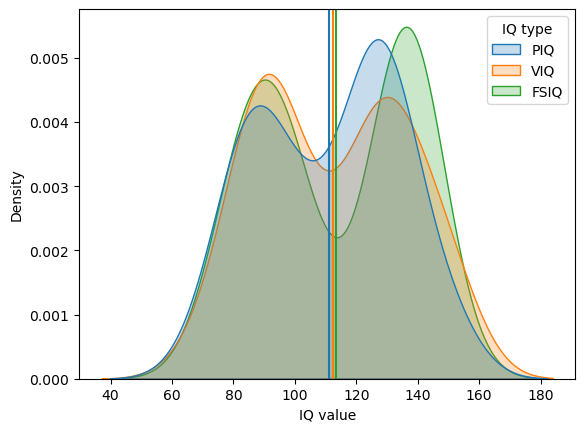

In [27]:
# Represent the distribution traced by each IQ type
sns.kdeplot(data=df_m, x="IQ value", hue='IQ type', fill='IQ type')

# Mark the mean IQ for each IQ type: PIQ (blue), VIQ (orange), FSIQ (green)
plt.axvline(x=df_g['Mean_IQ']['PIQ'], color=sns.color_palette()[0])
plt.axvline(x=df_g['Mean_IQ']['VIQ'], color=sns.color_palette()[1])
plt.axvline(x=df_g['Mean_IQ']['FSIQ'], color=sns.color_palette()[2])
# Note how we used the same default colors used by Seaborn with sns.color_palette()[ ] ;)

At first sight, all three IQ estimators exhibit quite alike bimodal distributions with very similar means for `IQ value`. Now, let's check it out!

In [28]:
# Launching a PSTT to check if PIQ mean differs from VIQ mean
print(stats.ttest_rel(df['PIQ'], df['VIQ']))

# Launching a PSTT to check if PIQ mean differs from FSIQ mean
print(stats.ttest_rel(df['PIQ'], df['FSIQ']))

# Launching a PSTT to check if VIQ mean differs from FSIQ mean
print(stats.ttest_rel(df['VIQ'], df['FSIQ']))

TtestResult(statistic=np.float64(-0.5445841763599564), pvalue=np.float64(0.5891401178507841), df=np.int64(39))
TtestResult(statistic=np.float64(-1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))
TtestResult(statistic=np.float64(-0.8913911665594247), pvalue=np.float64(0.37818604189634275), df=np.int64(39))


Assuming again a significance level of $0.05$, we cannot report a significant difference between the three IQ estimators available.

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Imagine that (instead of three IQ estimators) you have, let's say, one hundred. Getting all possible pairs and writing the corresponding statistical tests by hand could be dangerous. In these situations you should <i>loop</i> along all possible pair combinations:

</div>

In [31]:
# Load the itertools package
import itertools

# Define a list with all our IQ estimators
list_IQs = ['PIQ', 'VIQ', 'FSIQ']

# Get a list with all possible list_IQs combinations pairs (repeat=2)
list_IQ_pairs = itertools.combinations(iterable=list_IQs, r=2) 

# Loop along all possible pairs...
for pair in list_IQ_pairs:
    
    #... print the running pair and its corresponding paired samples t-test outcome
    print(pair, stats.ttest_rel(df[pair[0]], df[pair[1]]), '\n')

('PIQ', 'VIQ') TtestResult(statistic=np.float64(-0.5445841763599564), pvalue=np.float64(0.5891401178507841), df=np.int64(39)) 

('PIQ', 'FSIQ') TtestResult(statistic=np.float64(-1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39)) 

('VIQ', 'FSIQ') TtestResult(statistic=np.float64(-0.8913911665594247), pvalue=np.float64(0.37818604189634275), df=np.int64(39)) 



<div class="alert alert-block alert-warning">
    
<b>Extension:</b> You can also achieve this with a **list comprehension** instead of a **for loop**:

</div>

In [33]:
# Define a list with all our IQ estimators
list_IQs = ['PIQ', 'VIQ', 'FSIQ']

# Get a list with all possible list_IQs combinations pairs (repeat=2)
list_IQ_pairs = itertools.combinations(iterable=list_IQs, r=2) 

# Give a tuple ( , ) with the running pair and its corresponding paired samples t-test outcome for all possible pairs
[( pair, stats.ttest_rel(df[pair[0]], df[pair[1]]) ) for pair in list_IQ_pairs]

[(('PIQ', 'VIQ'),
  TtestResult(statistic=np.float64(-0.5445841763599564), pvalue=np.float64(0.5891401178507841), df=np.int64(39))),
 (('PIQ', 'FSIQ'),
  TtestResult(statistic=np.float64(-1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))),
 (('VIQ', 'FSIQ'),
  TtestResult(statistic=np.float64(-0.8913911665594247), pvalue=np.float64(0.37818604189634275), df=np.int64(39)))]

<div class="alert alert-block alert-success">
    
<b>Practice 1:</b> Test if the weight for females and males is different using a t-test.

1) Which t-test will you use (one-, two- or paired-sample t-test)? Why?
2) In the 1<sup>st</sup> code cell below, use the chosen t-test to statistically evaluate the weight difference between females and males. What happened in this first try?
3) In the 2<sup>nd</sup> code cell below, try again with the `stats.ttest_***()` argument `nan_policy='omit'`. What happened in this second try? What was the outcome of your t-test?
4) In the 3<sup>rd</sup> code cell below, prepare a nice plot showing the weight distribution for females and males, marking their corresponding mean values with vertical lines.

<b>Note:</b> Uncomment and fill only those code lines with underscores `___`.

</div>

In [34]:
# (1st code cell)

# Prepare filters for females and males
#filter_F = ___
#filter_M = ___

# Launching a 2STT to check if the weight mean differs between females and males
#stats.___(___, ___)

In [35]:
# (1st code cell --> SOLUTION)

# Prepare filters for females and males
filter_F = df['Gender'] == 'Female'
filter_M = df['Gender'] == 'Male'

# Launching a 2STT to check if the weight mean differs between females and males
stats.ttest_ind(df[filter_F]['Weight [kg]'], df[filter_M]['Weight [kg]'])

TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [36]:
# (2nd code cell)

# Launching a 2STT to check if the weight mean differs between females and males
#stats.___(___, ___, ___)

In [37]:
# (2nd code cell --> SOLUTION)

# Launching a 2STT to check if the weight mean differs between females and males
stats.ttest_ind(df[filter_F]['Weight [kg]'], df[filter_M]['Weight [kg]'], nan_policy='omit')

TtestResult(statistic=np.float64(-4.870950921940698), pvalue=np.float64(2.22729301836211e-05), df=np.float64(36.0))

In [38]:
# (3rd code cell)

# Group by 'Gender' and get the mean weight
#df_g = df.groupby(by=___).agg(Mean_Weight_kg=(___, ___))

# Show the data frame
#print(df_g)

# Represent the distribution traced by weight differentiating males and females
#sns.kdeplot(data=___, x=___, hue=___, fill=___)

# Mark the mean weight for males (orange) and females (blue)
#plt.axvline(x=___['Mean_Weight_kg'][___], color=sns.color_palette()[___])
#plt.axvline(x=___['Mean_Weight_kg'][___], color=sns.color_palette()[___])
# Note how we used the same default colors used by Seaborn with sns.color_palette()[ ] ;)

        Mean_Weight_kg
Gender                
Female       62.232873
Male         75.497930


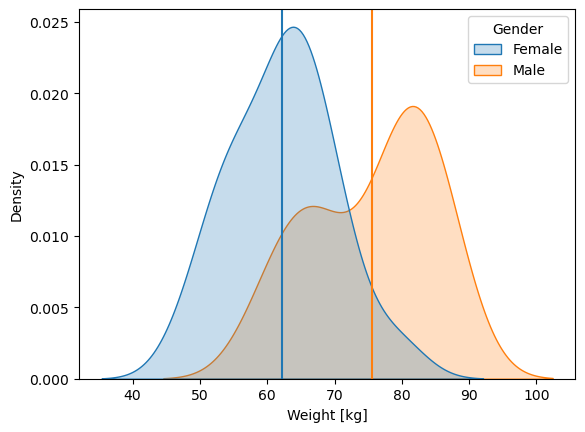

In [39]:
# (3rd code cell --> SOLUTION)

# Group by 'Gender' and get the mean weight
df_g = df.groupby(by='Gender').agg(Mean_Weight_kg=('Weight [kg]', 'mean'))

# Show the data frame
print(df_g)

# Represent the distribution traced by weight differentiating males and females
sns.kdeplot(data=df, x='Weight [kg]', hue='Gender', fill='Gender')

# Mark the mean weight for males (orange) and females (blue)
plt.axvline(x=df_g['Mean_Weight_kg']['Female'], color=sns.color_palette()[0])
plt.axvline(x=df_g['Mean_Weight_kg']['Male'], color=sns.color_palette()[1])
# Note how we used the same default colors used by Seaborn with sns.color_palette()[ ] ;)

<div class="alert alert-block alert-success"><b>Practice 1 ends here.</b>

</div>

# Linear models, multiple factors, and analysis of variance
Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

> y = ax + b + e

where e is observation noise. We will use the statsmodels module to:

Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
Test that coef is non zero.

In [118]:
x = np.linspace(-5, 5, 20)
x2= np.linspace(0,10, 20)
x3=  np.random.normal(size=20)

np.random.seed(1)
# normal distributed noise
y = -5 + 3*x -10*x2 + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x,'x2': x2, 'x3':x3, 'y': y})

In [114]:
-5 + 4*np.random.normal(size=x.shape).mean()

np.float64(-5.533458545842918)

In [115]:
data

,x,x2,x3,y
0,-5.000000,0.000000,1.624345,-20.000000
1,-4.473684,0.526316,-0.611756,-23.684211
2,-3.947368,1.052632,-0.528172,-27.368421
3,-3.421053,1.578947,-1.072969,-31.052632
4,-2.894737,2.105263,0.865408,-34.736842
5,-2.368421,2.631579,-2.301539,-38.421053
6,-1.842105,3.157895,1.744812,-42.105263
7,-1.315789,3.684211,-0.761207,-45.789474
8,-0.789474,4.210526,0.319039,-49.473684
9,-0.263158,4.736842,-0.249370,-53.157895


In [94]:
model = ols("Weight_kg ~ Height_m + 1", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Weight_kg   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     34.51
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           1.02e-06
Time:                        17:51:59   Log-Likelihood:                -130.53
No. Observations:                  38   AIC:                             265.1
Df Residuals:                      36   BIC:                             268.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -59.1274     21.763     -2.717      0.0

<Axes: xlabel='Height_m', ylabel='Weight_kg'>

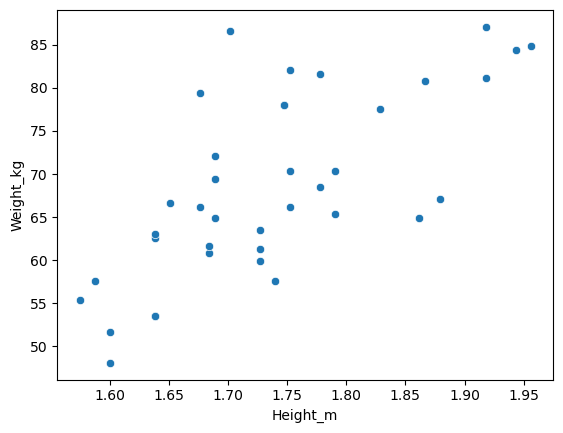

In [95]:
sns.scatterplot(data=df, x='Height_m', y='Weight_kg')

In [117]:
from statsmodels.formula.api import ols
model = ols("y ~ x + x2 + x3", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.309e+31
Date:                Mon, 08 Sep 2025   Prob (F-statistic):          7.73e-274
Time:                        18:01:56   Log-Likelihood:                 607.36
No. Observations:                  20   AIC:                            -1211.
Df Residuals:                      18   BIC:                            -1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.0000   3.69e-15  -1.49e+16      0.0

## Categorical variables:
 comparing groups or multiple categories


In [46]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Mon, 08 Sep 2025   Prob (F-statistic):              0.445
Time:                        14:42:23   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.


## Link to t-tests between different FSIQ and PIQ

To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


<Axes: xlabel='type', ylabel='iq'>

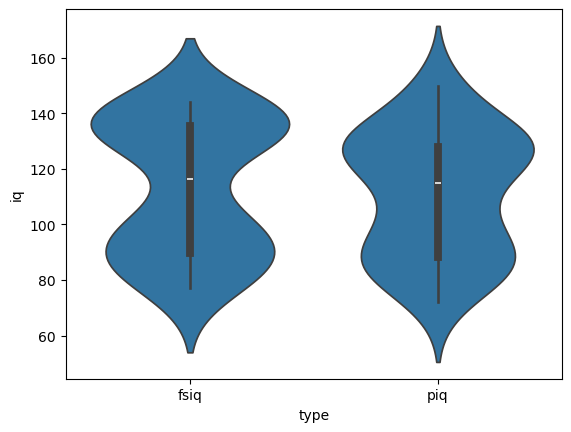

In [71]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

#sns.boxplot(data=data_long,x='type',y='iq')
sns.violinplot(data=data_long,x='type',y='iq')



In [72]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Mon, 08 Sep 2025   Prob (F-statistic):              0.643
Time:                        15:16:53   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

## Multiple Regression:
including multiple factors

In [74]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           1.58e-20
Time:                        17:44:07   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

# Analysis of variance (ANOVA)
In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test.

In [ ]:
print(model.f_test([0, 1, -1, 0]))